In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('data/residential-property-tax-payments.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8300\2228912252.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/residential-property-tax-payments.csv')


## Understanding the dataset

In [7]:
# Display the first few rows of the dataset
df.head()

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
0,2010,Residential,12351,264169027,LYTTLETON PRISCILLA,LYTTLETON KEITHTOUS,297 BELLEVUE ST,NaN,HARTFORD,CT,6120,2104,303,BELLEVUE ST,NaN,891.34,62.18,829.16
1,2010,Residential,5621,142707053,CZARNECKI EUGENE B,NaN,809 NEW BRITAIN AV,NaN,HARTFORD,CT,6106,3918,809,NEW BRITAIN AV,Y,0.00,0.00,0.00
2,2010,Residential,19109,203423193,SOUTHERN NEW ENGLAND CONFERENC,NaN,PO Box 269,NaN,HARTFORD,CT,6141,0,156,RUSS ST,Y,1458.38,1458.38,0.00
3,2010,Residential,2671,284074072,BROWN DERMOTH H,NaN,3372 MAIN ST,NaN,HARTFORD,CT,6120,1109,3364,MAIN ST,NaN,2373.16,1916.40,456.76
4,2010,Residential,17625,221270024,ROSCOE THOMAS,NaN,228 DAVENTRY DR,NaN,DEBARY,FL,32713,2137,312,GARDEN ST,NaN,2381.56,2381.56,0.00


In [8]:
# Display the last few rows of the dataset
df.tail()

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
136040,2017,Residential,25380,227544074,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,323-327,WASHINGTON ST,NaN,1216.06,0.0,1216.06
136041,2017,Residential,16312,147018080,CASTLEROCK 2017 LLC,NaN,333 WESTCHESTER AV WEST BUILDI,NaN,WHITE PLAINS,NY,10604,0,161,HAROLD ST,NaN,2592.94,0.0,2592.94
136042,2017,Residential,11083,193055038,IRVING VIOLET LOUISE,NaN,111 EAST 14TH STREET,c/o Mark Irving,NEW YORK,NY,10003,0,27,WOODSTOCK ST,NaN,2193.42,0.0,2193.42
136043,2017,Residential,25174,999999064,CROWN GARDENS,NaN,PROPERTY SERVICES INC,PO BOX 330487,WEST HARTFORD,CT,6133,0,26,ENFIELD ST,NaN,0.00,0.0,0.00
136044,2017,Residential,25486,227544084,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,333,WASHINGTON ST,NaN,1331.66,0.0,1331.66


In [9]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136045 entries, 0 to 136044
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YR             136045 non-null  int64  
 1   BILL_TYPE      136045 non-null  object 
 2   BILL_NUM       136045 non-null  int64  
 3   PARCEL_ID      136045 non-null  int64  
 4   TXPR_NAME      136045 non-null  object 
 5   CO_NAME        34288 non-null   object 
 6   MAIL_ADDR      136040 non-null  object 
 7   MAIL_ADDR2     4900 non-null    object 
 8   CITY           136034 non-null  object 
 9   STATE          136010 non-null  object 
 10  ZIP1           136045 non-null  int64  
 11  ZIP2           136045 non-null  int64  
 12  PROP_LOC_NUM   135988 non-null  object 
 13  PROP_LOC_NAME  136044 non-null  object 
 14  LIEN_SOLD      3429 non-null    object 
 15  BILLED         136045 non-null  float64
 16  PAID           136045 non-null  float64
 17  TAX_DUE        136045 non-nul

In [10]:
df.shape

(136045, 18)

In [11]:
df.columns

Index(['YR', 'BILL_TYPE', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'CO_NAME',
       'MAIL_ADDR', 'MAIL_ADDR2', 'CITY', 'STATE', 'ZIP1', 'ZIP2',
       'PROP_LOC_NUM', 'PROP_LOC_NAME', 'LIEN_SOLD', 'BILLED', 'PAID',
       'TAX_DUE'],
      dtype='object')

In [13]:
# Descriptive statistics for numerical columns
df.describe()

,YR,BILL_NUM,PARCEL_ID,ZIP1,ZIP2,BILLED,PAID,TAX_DUE
count,136045.000000,1.360450e+05,1.360450e+05,136045.000000,136045.000000,1.360450e+05,1.360450e+05,1.360450e+05
mean,2014.495843,2.076556e+04,2.012499e+08,7579.930332,1401.709456,8.536565e+03,7.845229e+03,6.913355e+02
std,1.777353,3.777817e+04,5.487155e+07,8480.252173,1565.618047,7.707653e+04,7.155735e+04,1.633742e+04
min,2010.000000,1.000000e+00,1.020010e+08,0.000000,-530.000000,-3.681800e+03,-3.661000e+03,-2.389005e+05
25%,2013.000000,6.769000e+03,1.625051e+08,6106.000000,0.000000,2.067500e+03,1.622560e+03,0.000000e+00
50%,2015.000000,1.350100e+04,1.982081e+08,6112.000000,1126.000000,3.295220e+03,3.129920e+03,0.000000e+00
75%,2016.000000,2.024000e+04,2.442881e+08,6114.000000,2418.000000,4.444480e+03,4.264100e+03,0.000000e+00
max,2017.000000,1.000003e+06,9.999992e+08,98409.000000,9792.000000,5.473181e+06,5.469784e+06,2.593094e+06


In [14]:
# Descriptive statistics for categorical columns
df.describe(include=['O'])

,BILL_TYPE,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD
count,136045,136045,34288,136040,4900,136034,136010,135988,136044,3429
unique,1,22180,6791,20052,772,863,55,1584,3995,1
top,Residential,BUSHNELL CONDOS LLC,MAGALHAES ROSA,621 FARMINGTON AV,C/O NAFTALI STEINMETZ,HARTFORD,CT,100,MAIN ST,Y
freq,136045,1459,90,2711,324,96529,122033,3208,2008,3429


## Data Cleaning and Preparation

In [19]:
df.head(20)

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
0,2010,Residential,12351,264169027,LYTTLETON PRISCILLA,LYTTLETON KEITHTOUS,297 BELLEVUE ST,NaN,HARTFORD,CT,6120,2104,303,BELLEVUE ST,NaN,891.34,62.18,829.16
1,2010,Residential,5621,142707053,CZARNECKI EUGENE B,NaN,809 NEW BRITAIN AV,NaN,HARTFORD,CT,6106,3918,809,NEW BRITAIN AV,Y,0.00,0.00,0.00
2,2010,Residential,19109,203423193,SOUTHERN NEW ENGLAND CONFERENC,NaN,PO Box 269,NaN,HARTFORD,CT,6141,0,156,RUSS ST,Y,1458.38,1458.38,0.00
3,2010,Residential,2671,284074072,BROWN DERMOTH H,NaN,3372 MAIN ST,NaN,HARTFORD,CT,6120,1109,3364,MAIN ST,NaN,2373.16,1916.40,456.76
4,2010,Residential,17625,221270024,ROSCOE THOMAS,NaN,228 DAVENTRY DR,NaN,DEBARY,FL,32713,2137,312,GARDEN ST,NaN,2381.56,2381.56,0.00
5,2010,Residential,2069,242229012,BETHEL STREET COOPERATIVE ASSO,NaN,33 BETHEL ST,NaN,HARTFORD,CT,6120,2301,37,BETHEL ST,NaN,1204.68,1204.68,0.00
6,2010,Residential,8852,221236191,HAYNES EUGENE JR ESTATE,HAYNES EUGENE JR ESTATE,292 ALBANY AV,NaN,HARTFORD,CT,6120,2838,9,CENTER ST,NaN,1288.72,1288.72,0.00
7,2010,Residential,10213,294568061,HURST DONALD,NaN,114 SARGEANT ST,NaN,HARTFORD,CT,6105,1451,60,VAN BLOCK AV 010B,NaN,616.32,616.32,0.00
8,2010,Residential,3546,183517071,CARBELLO ELBERT L,NaN,94 WESTBROOK ST,NaN,HARTFORD,CT,6106,3471,19,HARBISON AV,NaN,2974.40,2974.40,0.00
9,2010,Residential,6721,283074175,EARLINGTON MILTON J,NaN,921 WEST BLVD,NaN,HARTFORD,CT,6105,4142,3430,MAIN ST,NaN,8778.56,8778.56,0.00


In [17]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

In [18]:
null_values

YR                    0
BILL_TYPE             0
BILL_NUM              0
PARCEL_ID             0
TXPR_NAME             0
CO_NAME          101757
MAIL_ADDR             5
MAIL_ADDR2       131145
CITY                 11
STATE                35
ZIP1                  0
ZIP2                  0
PROP_LOC_NUM         57
PROP_LOC_NAME         1
LIEN_SOLD        132616
BILLED                0
PAID                  0
TAX_DUE               0
dtype: int64

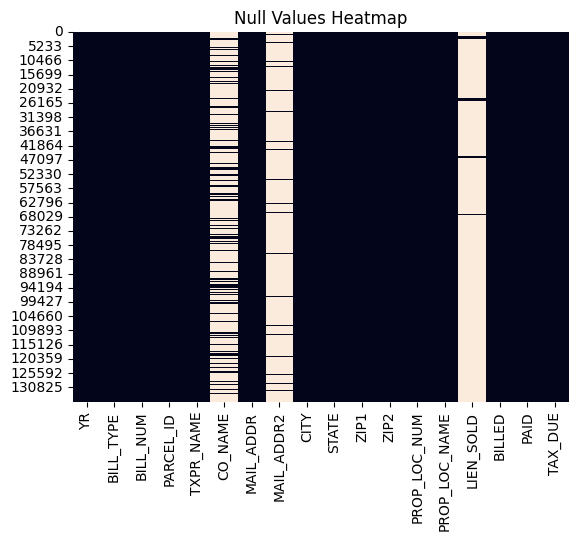

In [25]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [26]:
df.columns

Index(['YR', 'BILL_TYPE', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'CO_NAME',
       'MAIL_ADDR', 'MAIL_ADDR2', 'CITY', 'STATE', 'ZIP1', 'ZIP2',
       'PROP_LOC_NUM', 'PROP_LOC_NAME', 'LIEN_SOLD', 'BILLED', 'PAID',
       'TAX_DUE'],
      dtype='object')

In [31]:
# Handle missing values
df['CO_NAME'].fillna(df['CO_NAME'].mode()[0], inplace=True)
df['PROP_LOC_NAME'].fillna(df['PROP_LOC_NAME'].mode()[0], inplace=True)

In [32]:
df.isnull().sum()

YR                    0
BILL_TYPE             0
BILL_NUM              0
PARCEL_ID             0
TXPR_NAME             0
CO_NAME               0
MAIL_ADDR             5
MAIL_ADDR2       131145
CITY                 11
STATE                35
ZIP1                  0
ZIP2                  0
PROP_LOC_NUM         57
PROP_LOC_NAME         0
LIEN_SOLD        132616
BILLED                0
PAID                  0
TAX_DUE               0
dtype: int64

In [34]:
# Drop rows where 'MAIL_ADDR' is not found
df = df.dropna(subset=['MAIL_ADDR'])
df.isnull().sum()

YR                    0
BILL_TYPE             0
BILL_NUM              0
PARCEL_ID             0
TXPR_NAME             0
CO_NAME               0
MAIL_ADDR             0
MAIL_ADDR2       131143
CITY                 11
STATE                35
ZIP1                  0
ZIP2                  0
PROP_LOC_NUM         57
PROP_LOC_NAME         0
LIEN_SOLD        132612
BILLED                0
PAID                  0
TAX_DUE               0
dtype: int64

In [35]:
# Drop rows where 'CITY' and 'STATE' are not found
df.dropna(subset=['CITY'], inplace=True)
df.dropna(subset=['STATE'], inplace=True)
df.isnull().sum()

YR                    0
BILL_TYPE             0
BILL_NUM              0
PARCEL_ID             0
TXPR_NAME             0
CO_NAME               0
MAIL_ADDR             0
MAIL_ADDR2       131107
CITY                  0
STATE                 0
ZIP1                  0
ZIP2                  0
PROP_LOC_NUM         57
PROP_LOC_NAME         0
LIEN_SOLD        132575
BILLED                0
PAID                  0
TAX_DUE               0
dtype: int64

In [40]:
# Convert 'year' column to datetime type if it's not already
df['YR'] = pd.to_datetime(df['YR'], format='%Y')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136002 entries, 0 to 136044
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   YR             136002 non-null  datetime64[ns]
 1   BILL_TYPE      136002 non-null  object        
 2   BILL_NUM       136002 non-null  int64         
 3   PARCEL_ID      136002 non-null  int64         
 4   TXPR_NAME      136002 non-null  object        
 5   CO_NAME        136002 non-null  object        
 6   MAIL_ADDR      136002 non-null  object        
 7   MAIL_ADDR2     4895 non-null    object        
 8   CITY           136002 non-null  object        
 9   STATE          136002 non-null  object        
 10  ZIP1           136002 non-null  int64         
 11  ZIP2           136002 non-null  int64         
 12  PROP_LOC_NUM   135945 non-null  object        
 13  PROP_LOC_NAME  136002 non-null  object        
 14  LIEN_SOLD      3427 non-null    object        
 15  BILLE

### Q1. What are the average property tax payments over the years?

In [43]:
# Calculate average property tax payments per year
average_tax_per_year = df.groupby(df['YR'].dt.year)['PAID'].mean()

In [44]:
average_tax_per_year

YR
2010    7155.850826
2011    6563.380605
2012    7610.009301
2013    8341.653539
2014    8541.087922
2015    8419.544738
2016    9044.988186
2017    5420.402710
Name: PAID, dtype: float64

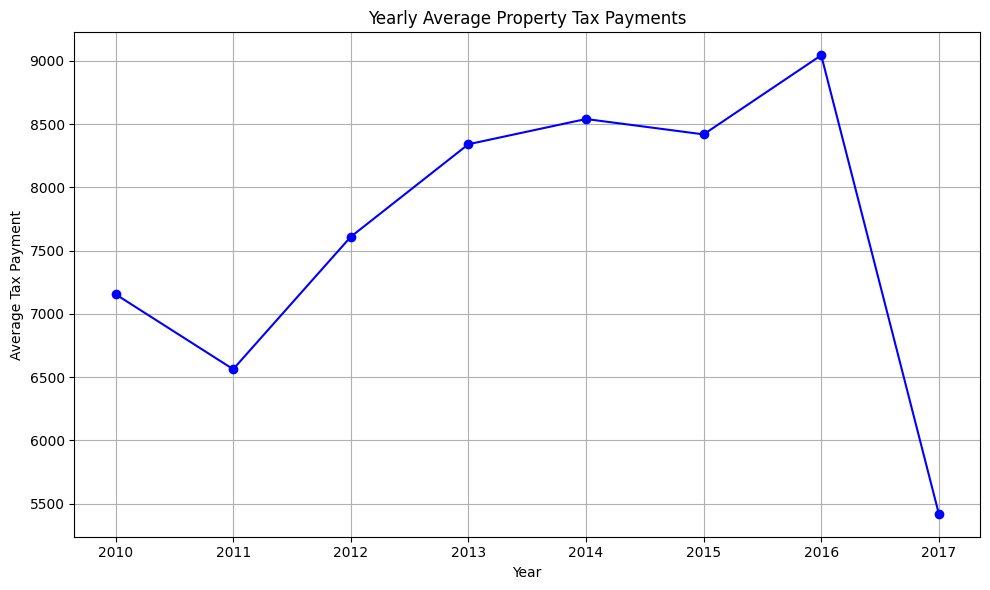

In [45]:
plt.figure(figsize=(10, 6))
average_tax_per_year.plot(marker='o', color='b', linestyle='-')
plt.title('Yearly Average Property Tax Payments')
plt.xlabel('Year')
plt.ylabel('Average Tax Payment')
plt.grid(True)
plt.tight_layout()
plt.show()

### Q2. How do property tax payments vary by different geographic city or state?

In [50]:
# Group by city and calculate the average property tax payments
avg_tax_by_city = df.groupby('CITY')['PAID'].mean()
avg_tax_by_city

CITY
ADELPHI        2368.697500
AGAWAM        48882.934286
AIRMONT       40708.426667
AKRON         42913.046667
ALAMEDA        1052.643333
                 ...      
Windsor        1990.990000
YONKERS       12466.917273
YORK              0.000000
YPSILANTI      1007.812222
hartford     131838.445000
Name: PAID, Length: 860, dtype: float64

In [54]:
# Top 10 cities with the highest average payments
top_cities = avg_tax_by_city.nlargest(10)
top_cities

CITY
SHORT HILLS           902580.080000
CONCORD               530322.112000
TOANO                 507029.260000
BAY HARBOR ISLANDS    457601.601667
CARLISLE              321699.226667
OAK BROOK             270325.305455
GREENS FARMS          266304.775000
PARSIPPANY            259817.516667
MONSEY                234259.657381
NEW ROCHELLE          232193.395000
Name: PAID, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_8300\846512412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


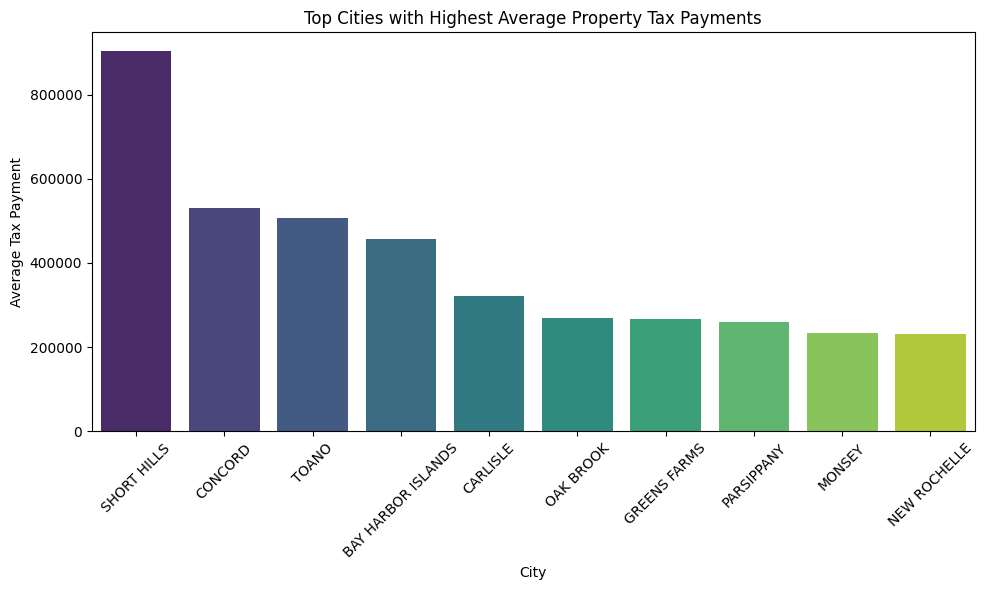

In [56]:
# Plot the variations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top Cities with Highest Average Property Tax Payments')
plt.xlabel('City')
plt.ylabel('Average Tax Payment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
# Group by state and calculate the average property tax payments
avg_tax_by_state = df.groupby('STATE')['PAID'].mean()
avg_tax_by_state

STATE
AL     2201.837857
AP     2193.030000
AR     3974.945714
AZ    23766.431667
CA    13734.763648
CN    29584.108571
CO    13393.687961
CT     6788.495106
DC    49287.021852
DE    15637.911944
FC        0.000000
FL    19021.910083
GA    15105.095372
IA     5858.517021
ID     6306.686000
IL    92241.342410
IN    11465.178571
KS    21911.795000
KY     3305.654167
LA     2987.521429
M      3323.740000
MA    38771.147598
MB      729.220000
MD     8458.744768
ME    18688.057258
MI     5370.109697
MN     7501.588214
MO    22975.492169
NC    11206.830123
NE     2322.314444
NH    37617.202093
NJ    11780.692148
NU    12447.446667
NV     5047.187391
NY    14725.309344
OH    17054.253433
OK     3059.703037
OR     3551.530250
PA    19870.954158
PR     2993.953750
RI    30264.625702
SC     2749.754667
SD      771.788000
ST     1945.950000
TN    16963.532353
TX     6877.010569
UK     3301.958333
US     5888.410000
UT     1611.698372
VA    36717.405278
VI     4235.866667
WA     2748.046667
WI    

In [58]:
# Top 10 states with the highest average payments
top_states = avg_tax_by_state.nlargest(10)
top_states

STATE
IL    92241.342410
DC    49287.021852
MA    38771.147598
NH    37617.202093
VA    36717.405278
RI    30264.625702
CN    29584.108571
WI    25989.584444
AZ    23766.431667
MO    22975.492169
Name: PAID, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_8300\3973500146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


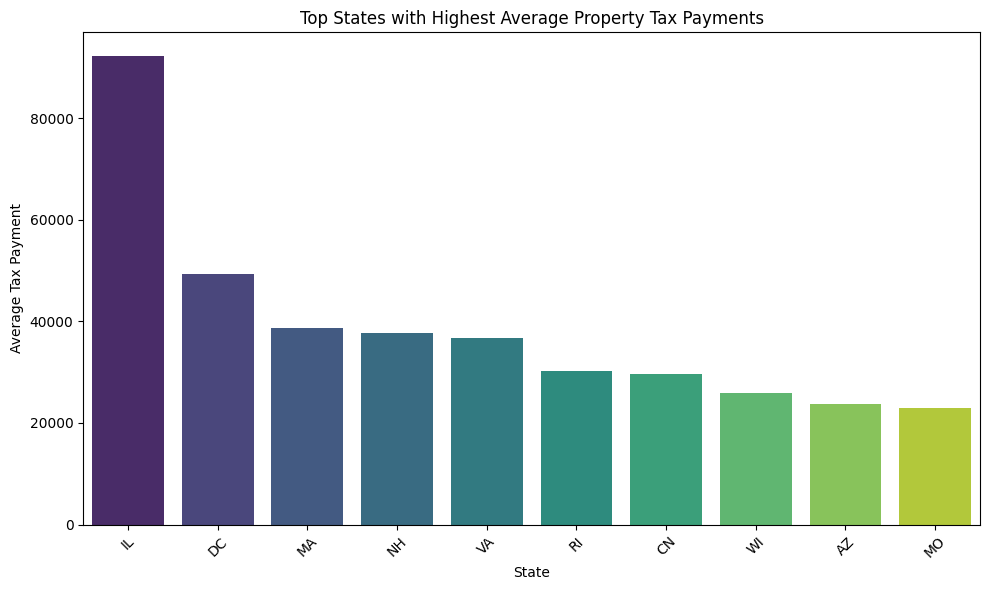

In [59]:
# Plot the variations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top States with Highest Average Property Tax Payments')
plt.xlabel('State')
plt.ylabel('Average Tax Payment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q3. What percentage of billed taxes are paid? (PAID / BILLED)

In [60]:
# Calculate the total amount paid and billed
total_paid = df['PAID'].sum()
total_billed = df['BILLED'].sum()

In [61]:
# Calculate the percentage of billed taxes that are paid
payment_completion_rate = (total_paid / total_billed) * 100

In [62]:
print(f"The percentage of billed taxes that are paid: {payment_completion_rate:.2f}%")

The percentage of billed taxes that are paid: 91.90%


### Q4. Is there any trend in the completion rate over time?

In [63]:
# Group by year, and calculate the total amount paid and billed for each year
yearly_totals = df.groupby('YR').agg({'PAID': 'sum', 'BILLED': 'sum'})
yearly_totals

,PAID,BILLED
YR,,
2010-01-01,6.934019e+06,7.957591e+06
2011-01-01,4.016789e+06,5.056360e+06
2012-01-01,1.729831e+08,1.741891e+08
2013-01-01,1.777022e+08,1.790231e+08
2014-01-01,1.822583e+08,1.838336e+08
2015-01-01,1.877558e+08,1.906463e+08
2016-01-01,2.050680e+08,2.096690e+08
2017-01-01,1.305016e+08,2.108700e+08


In [64]:
# Calculate the completion rate (percentage of billed taxes that are paid) for each year
yearly_totals['completion_rate'] = (yearly_totals['PAID'] / yearly_totals['BILLED']) * 100

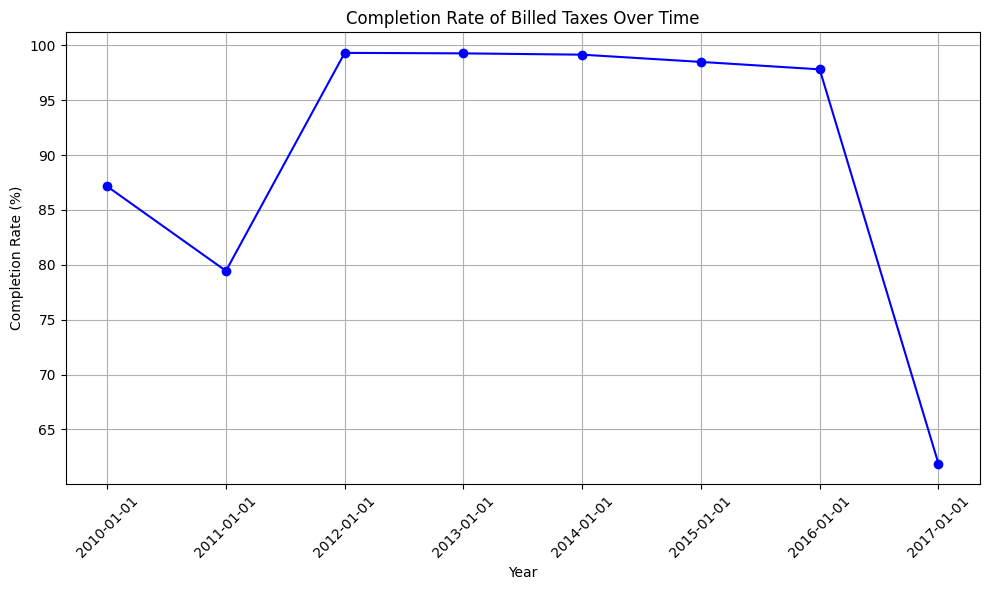

In [65]:
# Plot the completion rate over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals.index.astype(str), yearly_totals['completion_rate'], marker='o', color='b')
plt.title('Completion Rate of Billed Taxes Over Time')
plt.xlabel('Year')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Q5. How often are property tax payments late or incomplete? (PAID < BILLED)

In [66]:
# Count the number of records where the amount paid is less than the amount billed
late_incomplete_payments = df[df['PAID'] < df['BILLED']]

In [67]:
# Calculate the proportion of late or incomplete payments
proportion_late_incomplete = len(late_incomplete_payments) / len(df) * 100

In [68]:
print(f"The proportion of late or incomplete property tax payments: {proportion_late_incomplete:.2f}%")

The proportion of late or incomplete property tax payments: 13.88%


### Q6. Are there any patterns or trends in delinquent payments?

In [69]:
# Group by year, and calculate the proportion of delinquent payments for each year
yearly_payments = df.groupby('YR').size()
delinquent_payments = df[df['PAID'] < df['BILLED']].groupby('YR').size()
proportion_delinquent = (delinquent_payments / yearly_payments) * 100

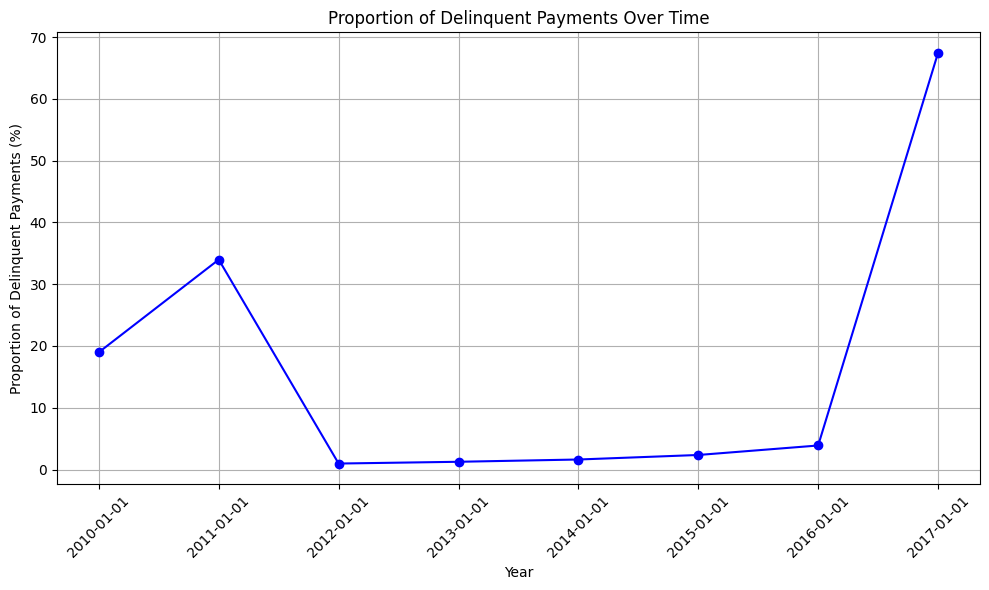

In [70]:
# Plot the proportion of delinquent payments over time
plt.figure(figsize=(10, 6))
plt.plot(proportion_delinquent.index.astype(str), proportion_delinquent, marker='o', color='b')
plt.title('Proportion of Delinquent Payments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Delinquent Payments (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Q7. How does the amount of tax due compare to the amount actually paid? (TAX_DUE vs. PAID)

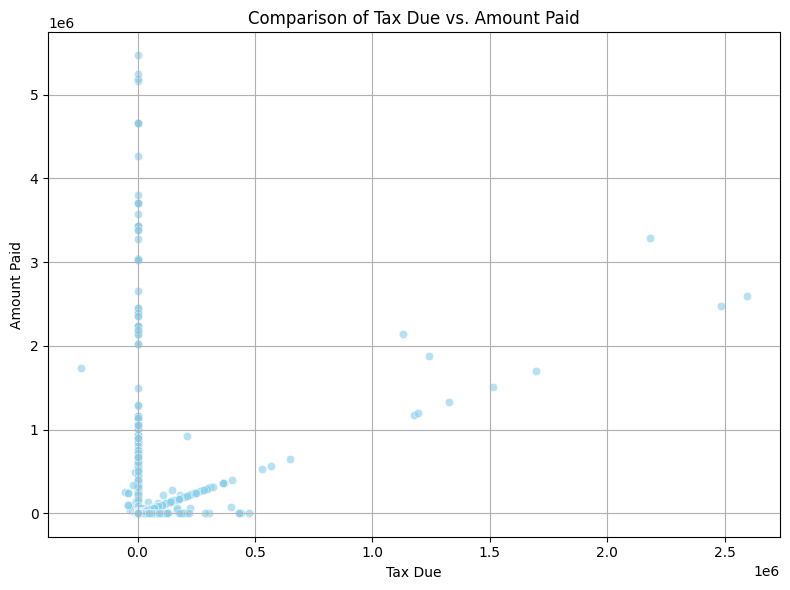

In [71]:
# Plot the relationship between tax due and amount paid using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TAX_DUE', y='PAID', data=df, color='skyblue', alpha=0.6)
plt.title('Comparison of Tax Due vs. Amount Paid')
plt.xlabel('Tax Due')
plt.ylabel('Amount Paid')
plt.grid(True)
plt.tight_layout()
plt.show()

## Detect and Analyze Outliers

In [79]:
# Calculate z-scores for property tax payments
df['z_score'] = (df['PAID'] - df['PAID'].mean()) / df['PAID'].std()

In [82]:
outliers = df[np.abs(df['z_score']) > 3]

In [83]:
outliers.describe()

,YR,BILL_NUM,PARCEL_ID,ZIP1,ZIP2,BILLED,PAID,TAX_DUE,z_score
count,396,396.000000,3.960000e+02,396.000000,396.000000,3.960000e+02,3.960000e+02,3.960000e+02,396.000000
mean,2014-06-12 04:18:10.909090816,18845.810606,2.361002e+08,12104.580808,1778.744949,8.912439e+05,8.332431e+05,5.800080e+04,11.532938
min,2010-01-01 00:00:00,9.000000,1.164750e+08,1028.000000,0.000000,1.976114e+05,2.229057e+05,-2.389005e+05,3.004930
25%,2013-01-01 00:00:00,5489.250000,2.024160e+08,6105.000000,0.000000,2.875584e+05,2.838480e+05,0.000000e+00,3.856453
50%,2014-07-02 12:00:00,10555.500000,2.453441e+08,6151.000000,0.000000,4.518223e+05,4.247763e+05,0.000000e+00,5.825590
75%,2016-01-01 00:00:00,20131.000000,2.693590e+08,11016.500000,2965.000000,8.140050e+05,7.465173e+05,0.000000e+00,10.321152
max,2017-01-01 00:00:00,512991.000000,3.166940e+08,92630.000000,9273.000000,5.473181e+06,5.469784e+06,2.593094e+06,76.317518
std,NaN,30748.998274,5.181618e+07,14478.127859,2497.878639,1.092712e+06,1.012357e+06,2.822592e+05,14.145269


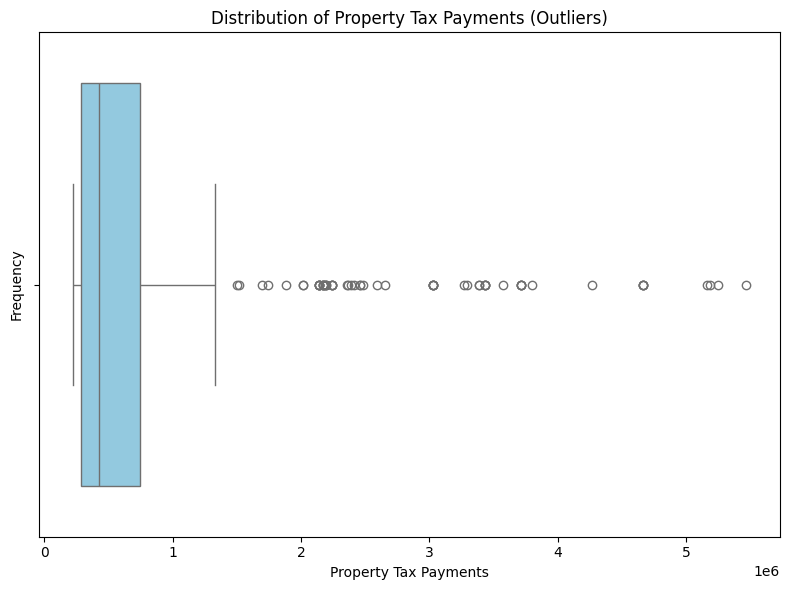

In [84]:
# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='PAID', data=outliers, color='skyblue')
plt.title('Distribution of Property Tax Payments (Outliers)')
plt.xlabel('Property Tax Payments')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()